In [1]:
import tensorflow as tf

C:\Users\a0970\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np

In [3]:
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display

In [108]:
def DisplayArray(a, fmt='jpeg', rng=[0,1]):

    a = (a - rng[0])/float(rng[1] - rng[0])*255
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    clear_output(wait = True)
    display(Image(data=f.getvalue()))

In [2]:
#tensor manipulate

#常數節點
node1= tf.constant(3.0,dtype=tf.float32)
node2= tf.constant(4.0)

In [3]:
print(node1,node2)

Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32)


In [4]:
#運算需要先建立一個session()
#並在session執行computational graph
sess= tf.Session()
print(sess.run([node1,node2]))

[3.0, 4.0]


In [5]:
node3= tf.add(node1,node2)
print('node3: ',node3)

node3:  Tensor("Add:0", shape=(), dtype=float32)


In [8]:
print("sess.run(node3): ", sess.run(node3))

sess.run(node3):  7.0


In [9]:
#placeholder
a=tf.placeholder(tf.float32)
b=tf.placeholder(tf.float32)
adder_node=a+b

In [11]:
print(sess.run(adder_node,{a:3,b:4.5}))

7.5


In [12]:
W= tf.Variable([.3], dtype=tf.float32)
b= tf.Variable([-.3],dtype= tf.float32)
x= tf.placeholder(tf.float32)
linear_model=W*x+b

In [14]:
init = tf.global_variables_initializer()
sess.run(init)

In [16]:
sess.run(linear_model,{x:[1,2,3,4,5]})

array([0.        , 0.3       , 0.6       , 0.90000004, 1.2       ],
      dtype=float32)

In [17]:
y= tf.placeholder(tf.float32)

In [22]:
#squared_deltas= tf.square(linear_model -y)
loss= tf.reduce_sum( tf.square(linear_model -y))

In [23]:
sess.run(loss,{x:[1,2,3,4], y:[0,-1,-2,-3]})

23.66

In [24]:
optimizer= tf.train.GradientDescentOptimizer(0.01)
train= optimizer.minimize(loss)

In [25]:
sess.run(init)
for i in range(1000):
    sess.run(train,{x:[1,2,3,4],y:[0,-1,-2,-3]})

In [26]:
print(sess.run([W,b]))

[array([-0.9999969], dtype=float32), array([0.9999908], dtype=float32)]


In [4]:
#完整線性模型
#模型參數
W= tf.Variable([.3], dtype= tf.float32)
b= tf.Variable([-.3], dtype= tf.float32)

#input ,output

x= tf.placeholder(tf.float32)
linear_model= W*x+ b
y= tf.placeholder(tf.float32)

#Loss function

loss= tf.reduce_sum(tf.square(linear_model-y))

#opimizer,learnning rate = 0.01
optimizer= tf.train.GradientDescentOptimizer(0.01)
train= optimizer.minimize(loss)

#training data

x_train=[1,2,3,4]
y_train=[0,-1,-2,-3]

#初始化、重設模型參數

init = tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)


#最佳化迴圈

for i in range(1000):
    sess.run(train, {x:x_train,y:y_train})
    
curr_W, curr_b, curr_loss= sess.run([W,b,loss],{x:x_train,y:y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))
sess.close()

AttributeError: module 'tensorflow.train' has no attribute 'SummaryWriter'

In [6]:
A = tf.constant(50, name='const_A')
B = tf.constant(100, name='const_B')

with tf.Session() as sess:
    # 就是這邊！
    # 使用 "with tf.name_scope('Run'):" 這句話可以畫出Run這個步驟。
    with tf.name_scope('Run'):
        B = sess.run(A+B)
    print(B)
    
    # 畫好步驟之後，要使用"tf.summary.FileWriter"把檔案寫到目標資料夾，
    # 第二個參數表示要把整個圖層放到graph參數內，這樣才能用tensorboard畫出來。
    train_writer = tf.summary.FileWriter('TensorBoard', sess.graph)
    train_writer.close()

150


In [8]:
arr1= np.array([1,2,3,4,5])

In [10]:
tf_tensor= tf.convert_to_tensor(arr1,dtype='float32')

In [23]:
tf_tensor

<tf.Tensor 'Const_1:0' shape=(3, 3) dtype=float32>

In [12]:
sess=tf.Session()

In [27]:
print(sess.run(tf_matrix))

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [18]:
arr2=np.array([[1,2,3],[4,5,6],[7,8,9]])

In [21]:
tf_tensor= tf.convert_to_tensor(arr2,dtype='float32')

In [25]:
tf_matrix=tf.constant(arr2)

In [26]:
tf_matrix

<tf.Tensor 'Const_2:0' shape=(3, 3) dtype=int32>

In [28]:
import matplotlib.image as mp_image
filename='output_11_1.png'
input_image= mp_image.imread(filename)

In [31]:
input_image.shape

(202, 385, 4)

In [33]:
import matplotlib.pyplot as plt
plt.imshow(input_image)

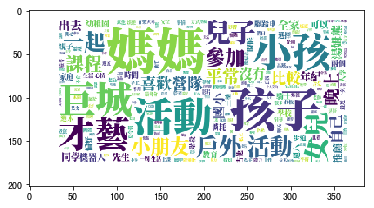

In [34]:
plt.imshow(input_image)

In [45]:
x=input_image
model=tf.global_variables_initializer()

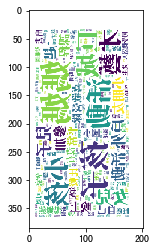

In [46]:
with tf.Session() as sess:
    x= tf.transpose(x,perm=[1,0,2])
    sess.run(model)
    result= sess.run(x)
plt.imshow(result)
plt.show()

In [50]:
uniform=tf.random_uniform([100],0,1,'float32')

C:\Users\a0970\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


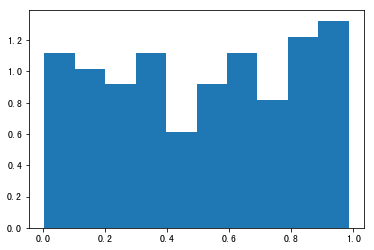

In [51]:
with tf.Session() as sess:
    plt.hist(uniform.eval(),normed=True)
    plt.show()

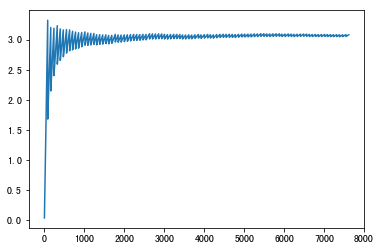

In [53]:
x=tf.random_uniform([1],-1,1,'float32')
y=tf.random_uniform([1],-1,1,'float32')
trials= 100
hits= 0
pi=[]
sess=tf.Session()
with sess.as_default():
    for i in range(1,trials):
        for j in range(1,trials):
            if x.eval()**2+y.eval()**2 <1:
                hits=hits+1
                pi.append((4*float(hits)/i)/trials)
                
plt.plot(pi)
plt.show()

In [75]:
#水滴模擬
N=500
u_init= np.zeros([N,N],dtype=np.float32)

#隨機產生40個雨滴
for n in range(40):
    a,b=np.random.randint(0,N,2)
    u_init[a,b]=np.random.uniform()
    

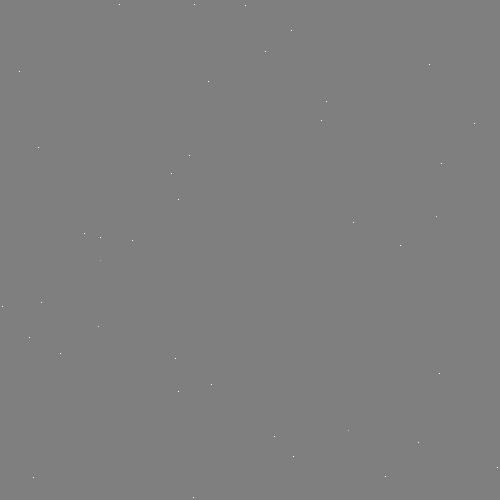

In [105]:
DisplayArray(u_init, rng=[-0.1, 0.1])

In [81]:
eps= tf.placeholder(tf.float32,shape=())

In [82]:
damping= tf.placeholder(tf.float32,shape=())

In [83]:
U= tf.Variable(u_init)
ut_init= np.zeros([N,N],dtype=np.float32)
Ut= tf.Variable(ut_init)

In [85]:
#定義model
U_= U+ eps*Ut



In [92]:
Ut_=Ut + eps* (laplace(U)- damping*Ut)

In [99]:
step= tf.group(U.assign(U_),
              Ut.assign(Ut_))


In [100]:
sess = tf.InteractiveSession()

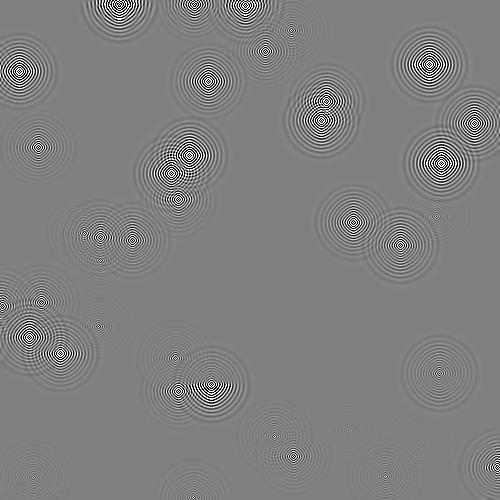

In [109]:

tf.global_variables_initializer().run()
with sess.as_default():
    for i in range(1000):
        step.run({eps:0.03,damping:0.04})
        DisplayArray(U.eval(), rng=[-0.1, 0.1])
            

In [90]:
#laplace
def make_kernel(a):
    a=np.asarray(a)
    a=a.reshape(list(a.shape)+[1,1])
    return tf.constant(a,dtype=1)
def simple_conv(x,k):
    x=tf.expand_dims(tf.expand_dims(x,0),-1)
    y=tf.nn.depthwise_conv2d(x,k,[1,1,1,1],padding='SAME')
    return y[0, :, :, 0]


In [91]:
def laplace(x):
    laplace_k= make_kernel([[0.5,1.0,0.5],
                          [1.0,-6.,1.0],
                          [0.5,1.0,0.5]])
    return simple_conv(x,laplace_k)

# 線性回歸

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

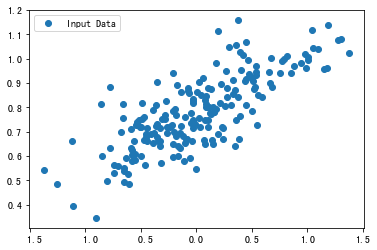

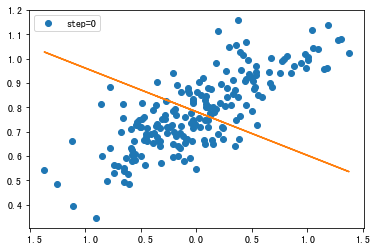

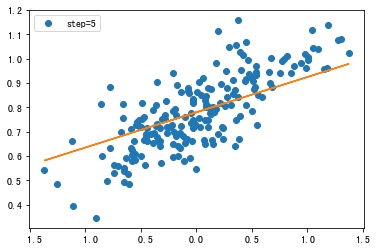

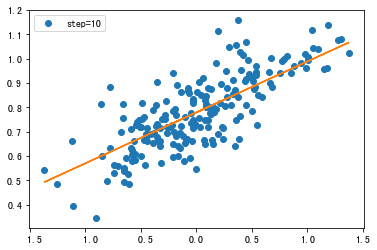

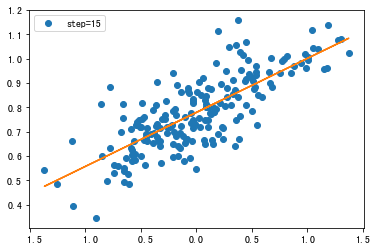

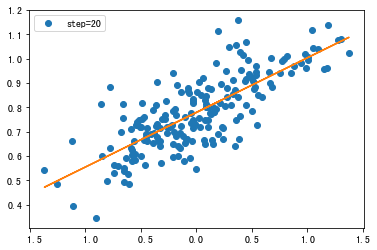

In [117]:
number_of_points=200
x_point=[]
y_point=[]

a=0.22
b=0.78

for i in range(number_of_points):
    x=np.random.normal(0.0,0.5)
    y=a*x+b+np.random.normal(0.0,0.1) #增加隨機誤差
    x_point.append(x)
    y_point.append(y)
plt.plot(x_point,y_point,'o',label='Input Data')
plt.legend()
plt.show()
#初始值
A= tf.Variable(tf.random_uniform([1],-1,1))
B= tf.Variable(tf.zeros([1]))
#model
y=A*x_point+B

#loss function
cost_function=tf.reduce_mean(tf.square(y-y_point))

#optimizer, we choose simple gradient descent,and learning rate= 0.01
optimizer= tf.train.GradientDescentOptimizer(0.5)
#optimizer的目標是最小化cost_function
train=optimizer.minimize(cost_function)

#Variable initialize is very important

model= tf.global_variables_initializer()

with tf.Session() as sess:
    with tf.name_scope('Run'):
    
    
    #將sess指向model以執行初始化
        sess.run(model)
        for step in range(21):
        #對每次迭代都執行最佳化
            sess.run(train)
            if step % 5 ==0:

                plt.plot(x_point,y_point,'o',\
                         label='step={}'.format(step))
                plt.plot(x_point,sess.run(A)*x_point + sess.run(B))
                plt.legend()
                plt.show()
    train_writer = tf.summary.FileWriter('TensorBoard', sess.graph)
    train_writer.close()

# MNIST資料集

In [11]:
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [19]:
test1,test2=mnist.test.next_batch(10)

In [21]:
print(test1.shape)
print(test2.shape)

(10, 784)
(10, 10)


In [8]:
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

# 檢視結構
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


In [28]:
np.argmax(y_train[3])

6

In [29]:
y_train[3]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

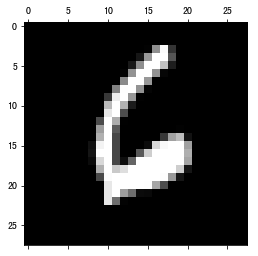

In [14]:
first_train_img = np.reshape(x_train[3, :], (28, 28))
plt.matshow(first_train_img, cmap = plt.get_cmap('gray'))
plt.show()

In [30]:
train_pixel_tensor= tf.placeholder(dtype=tf.float32,shape=[None,784])
test_pixel_tensor= tf.placeholder(tf.float32,shape=[784])
#cost function:distance 

distance = tf.reduce_sum(tf.square(tf.add(train_pixel_tensor,tf.negative(test_pixel_tensor))),reduction_indices=1)
pred=tf.arg_min(distance,0)

In [31]:
#Testing and algorithm evaluation
accuracy=0.
#初始化變數
init=tf.global_variables_initializer()

In [32]:
with tf.Session() as sess:
    for i in range(len(y_test)):
        nn_index=sess.run(pred,feed_dict={train_pixel_tensor:x_train,test_pixel_tensor:x_test[i,]})
        if np.argmax(y_train[nn_index])==np.argmax(y_test[i]):
            accuracy+=1./len(x_test)
print('result= ',accuracy)
            

result=  0.9676999999999097


In [41]:
np.random.normal(0,0.01,100)[:,np.newaxis].shape

(100, 1)